# Download Required Packages

In [75]:
%%capture
%pip install numpy
%pip install matplotlib
%pip install pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Parse Dataset

In [105]:
temp_data = np.genfromtxt('./CollectedData.tsv', delimiter='\t', dtype='float')
temp_data = np.delete(temp_data, 0, 0)
temp_stringData = np.genfromtxt('./CollectedData.tsv', delimiter='\t', dtype=str)
temp_stringData = np.delete(temp_stringData, 0, 0)

x_index = 18
y_index = 14

data = []
stringData = []

for d, str_d in zip(temp_data, temp_stringData):
    if d[x_index] > 0 and d[y_index] > 0 and str_d[15] == "Single Family" and str_d[20] == 'Active':
        data.append(d)
        stringData.append(str_d)
data = np.array(data)

# Plot Sqft Area vs Price

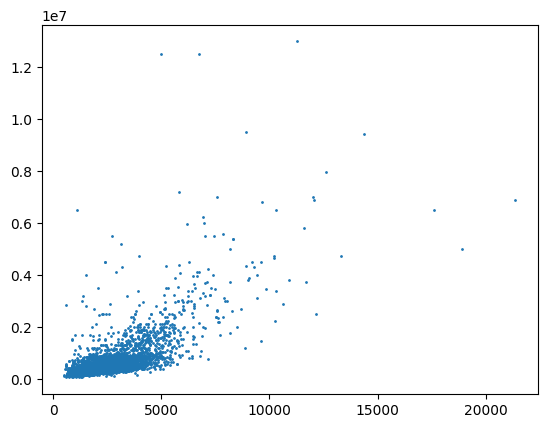

In [106]:
plt.scatter(data[:, x_index], data[:, y_index], s=1)

# Run 2D Gradient Descent Algo

[0/15]: x0 = -0.45426944119014817 x1=220.17099961546975


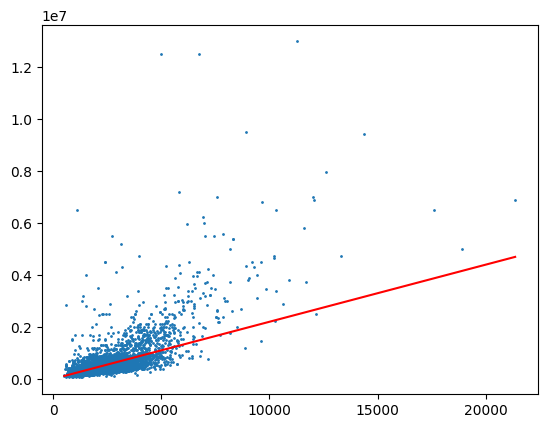

[1/15]: x0 = -0.975882598947666 x1=220.1711863326788


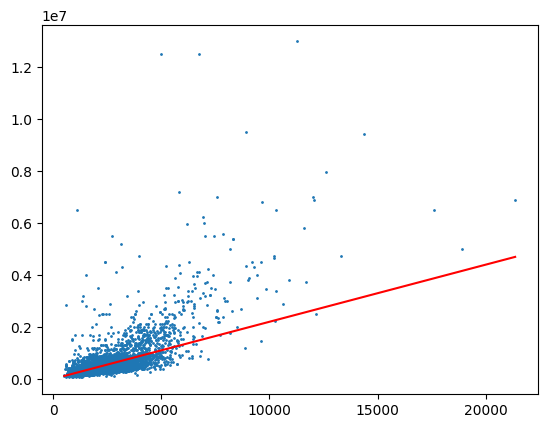

[2/15]: x0 = -1.4974950178942976 x1=220.17137304962333


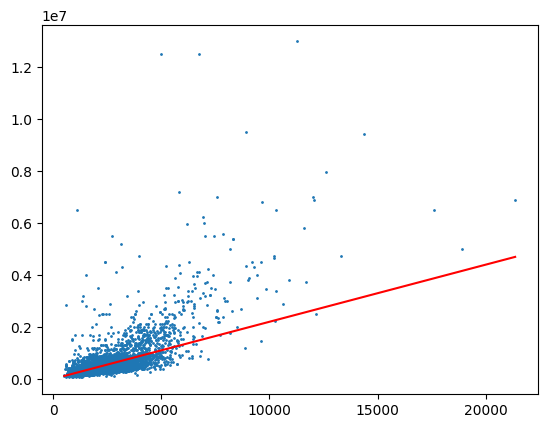

[3/15]: x0 = -2.0191066980310874 x1=220.17155976630355


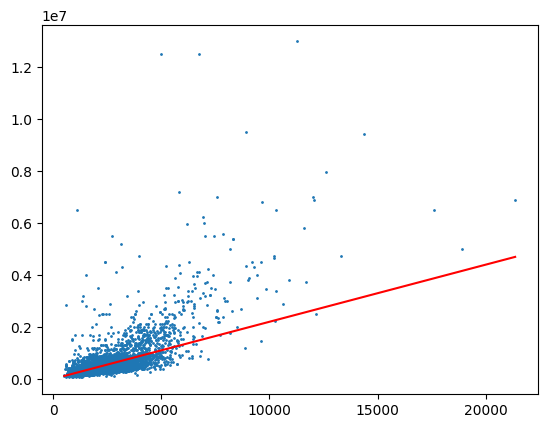

[4/15]: x0 = -2.5407176393591104 x1=220.17174648271904


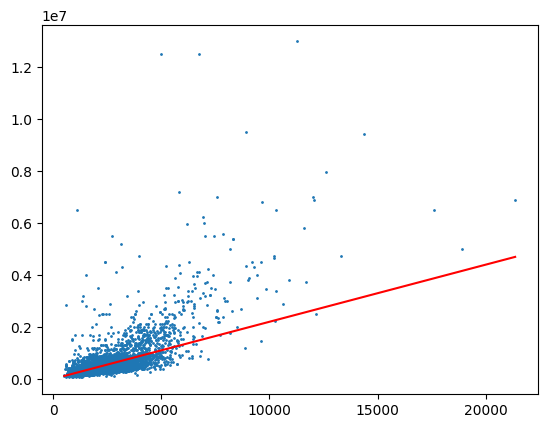

[5/15]: x0 = -3.0623278418793767 x1=220.17193319887022


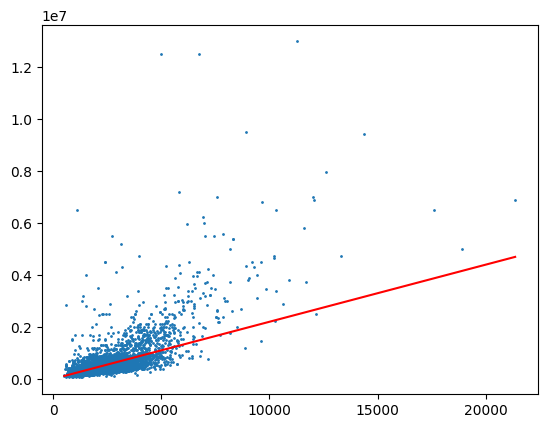

[6/15]: x0 = -3.583937305592951 x1=220.1721199147569


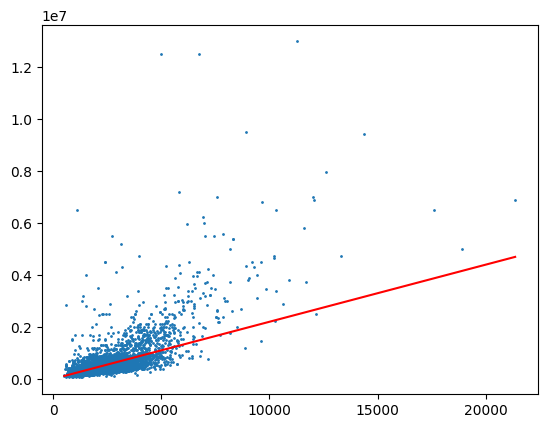

[7/15]: x0 = -4.105546030500886 x1=220.17230663037918


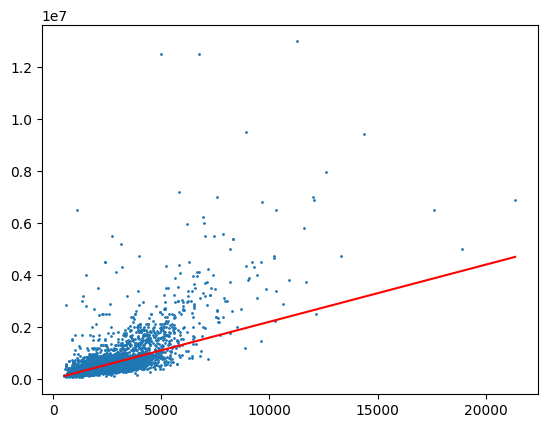

[8/15]: x0 = -4.627154016604227 x1=220.1724933457369


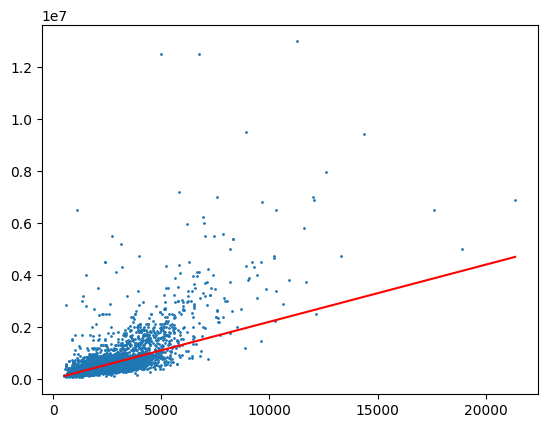

[9/15]: x0 = -5.148761263903959 x1=220.17268006083015


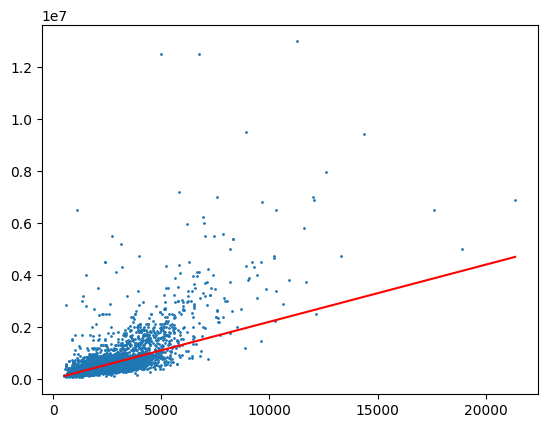

[10/15]: x0 = -5.670367772401259 x1=220.1728667756589


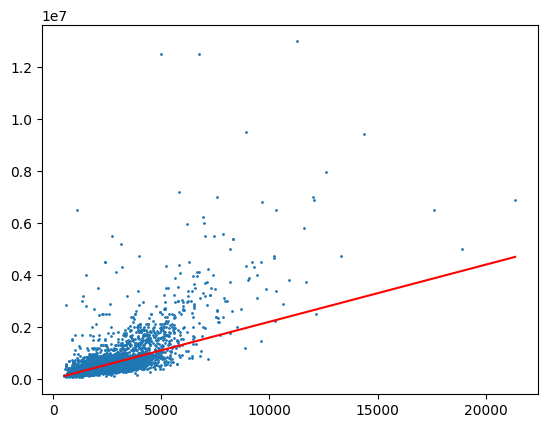

[11/15]: x0 = -6.1919735420970134 x1=220.17305349022345


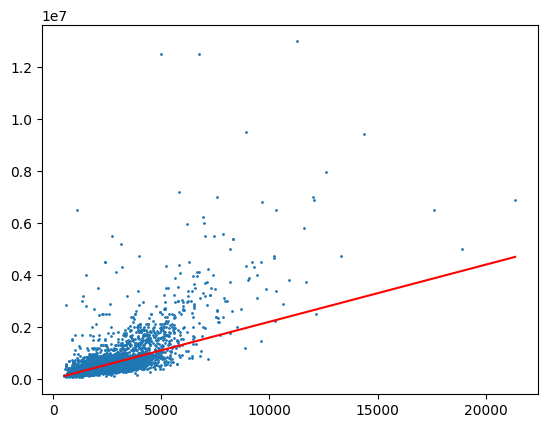

[12/15]: x0 = -6.71357857299237 x1=220.17324020452318


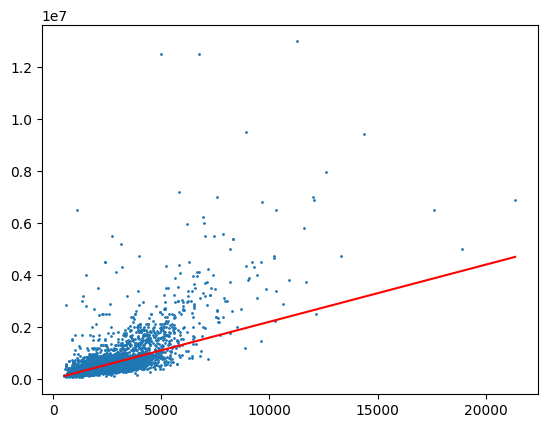

[13/15]: x0 = -7.2351828650884045 x1=220.1734269185587


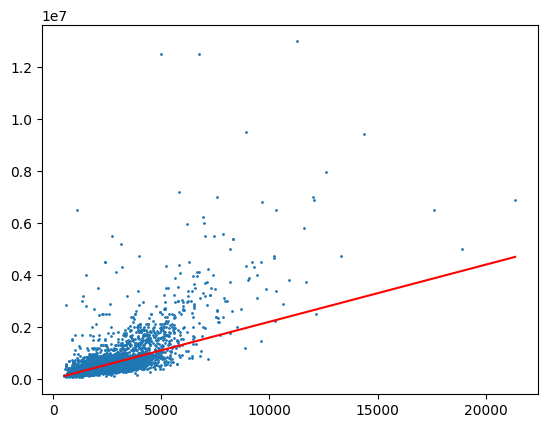

[14/15]: x0 = -7.7567864183860875 x1=220.17361363232973


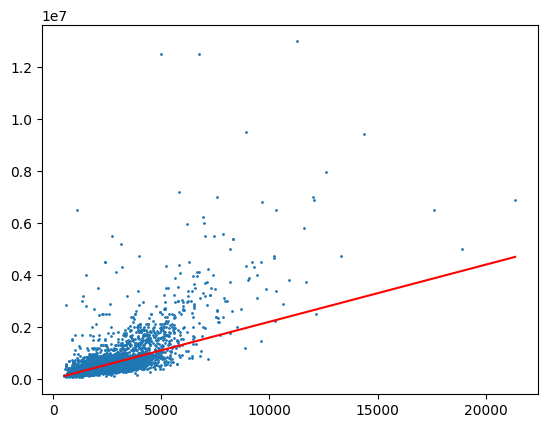

theta_0:  [-7.75678642]
theta_1:  [220.17361363]


In [107]:
placeholder_x = np.arange(np.amin(data[:, x_index]), np.amax(data[:,x_index]))

def sgd(data, training_rate=0.000000001, iters=15):
    theta = np.array([[0],[0]])
    X = data[:, [x_index]].astype(int)
    X_1 = np.ones(X.shape, dtype=X.dtype)
    X = np.hstack((X_1, X))
    Y = data[:, [y_index]].T[0].astype(int)

    for _ in range(iters):
        for x, y in zip(X, Y):
            h_x = np.matmul(theta.T, x)
            x = np.reshape(x, theta.shape)
            theta = theta - training_rate * (h_x - y) * x

        print(f'[{_}/{iters}]: x0 = {theta[0,0]} x1={theta[1,0]}')
        # plot charts
        plt.scatter(data[:, x_index], data[:, y_index], s=1)
        plt.plot(placeholder_x, theta[1,0]*placeholder_x + theta[0,0], color='red')
        plt.show()

    return theta


theta = sgd(data)
print("theta_0: ", theta[0])
print("theta_1: ", theta[1])


In [108]:
X = data[:, x_index]
Y = data[:, y_index]

i = 0
errors = []
for x, y in zip(X,Y):
    y_pred = theta[0] + theta[1] * x
    error = y - y_pred
    errors.append((error[0], i, x, y, y_pred[0], stringData[i][0]))
    i += 1

errors.sort()

print('i', '\t', 'error', '\t\t\t', 'x', '\t\t', 'y', '\t\t', 'y_pred', '\t\t', 'address')
for listing in errors:
    print(listing[1], '\t', listing[0], '\t', listing[2], '\t', listing[3], '\t', listing[4], '\t', listing[5])


i 	 error 			 x 		 y 		 y_pred 		 address
494 	 -824894.1015256362 	 7153.0 	 750000.0 	 1574894.1015256362 	 7707 Shelburne Cir
285 	 -779253.2378141403 	 8876.0 	 1175000.0 	 1954253.2378141403 	 9102 Cypresswood Dr
2302 	 -721776.8046703015 	 5095.0 	 400000.0 	 1121776.8046703015 	 8222 Howard Dr
221 	 -702130.5531273158 	 4483.0 	 284900.0 	 987030.5531273158 	 806 Shadow Ln
3513 	 -699307.0794024473 	 3887.0 	 156500.0 	 855807.0794024473 	 11928 Segrest Dr
1672 	 -691291.9779208784 	 4952.0 	 399000.0 	 1090291.9779208784 	 5207 Braesheather Dr
1558 	 -668284.445122346 	 5715.0 	 590000.0 	 1258284.445122346 	 17503 Hidden Forest Cir
1559 	 -668284.445122346 	 5715.0 	 590000.0 	 1258284.445122346 	 17503 Hidden Forest Cir
6494 	 -665979.975765741 	 9606.0 	 1449000.0 	 2114979.975765741 	 3918 Lake Star Dr
4569 	 -650412.5676263396 	 4725.0 	 389900.0 	 1040312.5676263396 	 19062 Shire
5550 	 -638929.7568281621 	 5400.0 	 550000.0 	 1188929.7568281621 	 Tract 3 Bobville Rd
3918